# 🎛 Feature Extraction: Converting Audio to MFCCs

In this notebook, we preprocess raw audio data by first converting it into audio waveform values (Time Domain)
which further down is used to extract **MFCC** (Frequency Domain) features. 

In [29]:
import matplotlib.pyplot as plt
import librosa as lb
import numpy as np
import pandas as pd
import yaml

# Getting the values from config file
with open("../config.yaml") as file:
    config = yaml.safe_load(file)
    
# Dataset to analyze
dataset = "urbanSound8K"

# Important paths ;)
dir_path = config["paths"][dataset]
csv_path = dir_path + "/UrbanSound8K.csv"

# Number of MFC Coeffs
numOfMFCCoeffs = config["preprocessing"]["numOfMFCCoeffs"]

In [30]:
# Load the csv file
df = pd.read_csv(csv_path)
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [31]:
# Choosing a random sound file
randomRowNumber = np.random.randint(0,df.shape[0]+1)
randomRow = df.iloc[randomRowNumber]
audioFilePath = f"{dir_path}/fold{randomRow["fold"]}/{randomRow["slice_file_name"]}"

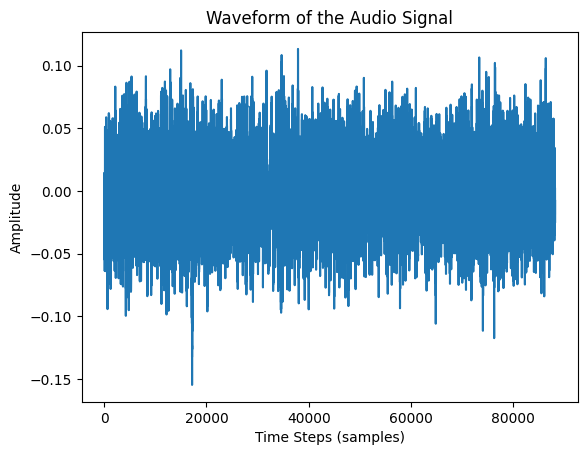

In [32]:
# Getting audio waveform and sampling rate i.e. Creating a numerical representation of given audio
audioWaveform, samplingRate = lb.load(audioFilePath)

# Plotting the waveform data ;)
plt.plot(audioWaveform)
plt.title("Waveform of the Audio Signal")
plt.xlabel("Time Steps (samples)")
plt.ylabel("Amplitude")
plt.show()

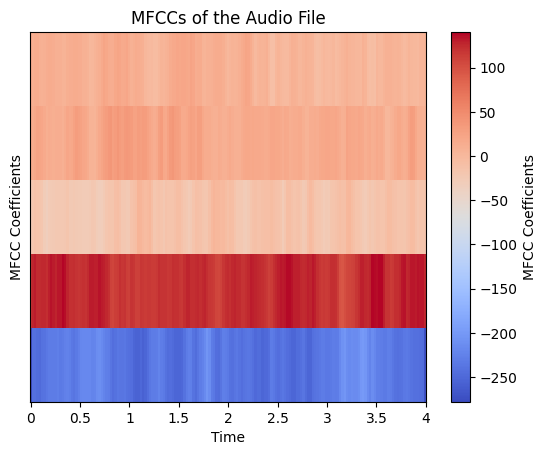

In [33]:
# Creating MFCCs from audio waveform and plotting 
mfccs = lb.feature.mfcc(y=audioWaveform, sr=samplingRate, n_mfcc=numOfMFCCoeffs)

lb.display.specshow(mfccs, x_axis="time", sr=samplingRate)
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs of the Audio File")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

In [34]:
# Getting idea of shapes
print(len(audioWaveform))
print(mfccs.shape)

# Note : First dimension of mfccs is Number of mel coeffs for each time frame, While second dimension is number of time frames for given audio

88200
(5, 173)
